In [643]:
import matplotlib.pyplot as plt
import seaborn as sns


In [644]:
import pandas as pd

# CSV 파일 경로 지정
file_path = 'train.csv'  # 파일 경로를 실제 위치로 변경하세요.

# CSV 파일 읽기
titanic_data = pd.read_csv(file_path)

# 데이터의 처음 몇 줄을 확인합니다.
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [645]:
# test.csv 파일 읽기
test_data = pd.read_csv('test.csv')

# 데이터 확인
print(test_data.head())


   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [647]:
# 각 열에서 결측치의 개수를 확인합니다.
missing_values = titanic_data.isnull().sum()

# 결측치가 있는 열과 그 개수를 출력합니다.
missing_values = missing_values[missing_values > 0]
print(missing_values)


Age         177
Cabin       687
Embarked      2
dtype: int64


In [648]:
# Age 결측치를 나이의 중앙값으로 채우는 방법
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Cabin 결측치를 'Unknown'으로 채우는 방법
titanic_data['Cabin'].fillna('Unknown', inplace=True)

# Embarked 결측치를 최빈값으로 채우는 방법
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


C:\Users\yeram\AppData\Local\Temp\ipykernel_21744\2372528430.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
C:\Users\yeram\AppData\Local\Temp\ipykernel_21744\2372528430.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [649]:
# Age 결측치 처리 (train.csv에서 사용한 중앙값으로 채우기)
test_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

# Fare 결측치 처리 (Fare는 테스트 데이터에서 추가적으로 결측치가 있을 수 있음)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Cabin 결측치 처리
test_data['Cabin'].fillna('Unknown', inplace=True)

# Embarked 결측치 처리 (최빈값으로 대체)
test_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)


C:\Users\yeram\AppData\Local\Temp\ipykernel_21744\1298945865.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
C:\Users\yeram\AppData\Local\Temp\ipykernel_21744\1298945865.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

In [650]:
# 원본 데이터 크기
print(f"원본 PassengerId 길이: {len(passenger_ids)}")
print(f"원본 테스트 데이터 길이: {test_data.shape}")

# 결측치 확인
print("결측치 개수:\n", test_data.isnull().sum())

# 원-핫 인코딩 이후 열 확인
print("원-핫 인코딩 이후 열:\n", test_data.columns)

# 누락된 열 확인
train_columns = titanic_data.columns.drop('Survived')  # Survived 제외
missing_cols = set(train_columns) - set(test_data.columns)
print(f"누락된 열: {missing_cols}")


원본 PassengerId 길이: 418
원본 테스트 데이터 길이: (418, 11)
결측치 개수:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
원-핫 인코딩 이후 열:
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
누락된 열: set()


In [651]:
# 결측치가 있는지 확인
print(titanic_data.isnull().sum().sum())  # 총 결측치 개수 확인


0


In [652]:
# 불필요한 열 제거
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [653]:
# PassengerId 저장
passenger_ids = test_data['PassengerId']

# 불필요한 열 제거
test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)


In [654]:
# 원본 데이터 크기
print(f"원본 PassengerId 길이: {len(passenger_ids)}")
print(f"원본 테스트 데이터 길이: {test_data.shape}")

# 결측치 확인
print("결측치 개수:\n", test_data.isnull().sum())

# 원-핫 인코딩 이후 열 확인
print("원-핫 인코딩 이후 열:\n", test_data.columns)

# 누락된 열 확인
train_columns = titanic_data.columns.drop('Survived')  # Survived 제외
missing_cols = set(train_columns) - set(test_data.columns)
print(f"누락된 열: {missing_cols}")


원본 PassengerId 길이: 418
원본 테스트 데이터 길이: (418, 7)
결측치 개수:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
원-핫 인코딩 이후 열:
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
누락된 열: set()


In [655]:
# 성별 변환
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 1, 'female': 0})

test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0})

In [656]:
# Embarked 열에 원-핫 인코딩 적용
titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)
# True/False를 0/1로 변환
titanic_data[['Embarked_Q', 'Embarked_S']] = titanic_data[['Embarked_Q', 'Embarked_S']].astype(int)


# 원-핫 인코딩 후 데이터 확인
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


In [657]:
# Embarked 열에 원-핫 인코딩 적용
test_data = pd.get_dummies(test_data, columns=['Embarked'], drop_first=True)
# True/False를 0/1로 변환
test_data[['Embarked_Q', 'Embarked_S']] = test_data[['Embarked_Q', 'Embarked_S']].astype(int)

In [658]:
# 원본 데이터 크기
print(f"원본 PassengerId 길이: {len(passenger_ids)}")
print(f"원본 테스트 데이터 길이: {test_data.shape}")

# 결측치 확인
print("결측치 개수:\n", test_data.isnull().sum())

# 원-핫 인코딩 이후 열 확인
print("원-핫 인코딩 이후 열:\n", test_data.columns)

# 누락된 열 확인
train_columns = titanic_data.columns.drop('Survived')  # Survived 제외
missing_cols = set(train_columns) - set(test_data.columns)
print(f"누락된 열: {missing_cols}")


원본 PassengerId 길이: 418
원본 테스트 데이터 길이: (418, 8)
결측치 개수:
 Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64
원-핫 인코딩 이후 열:
 Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')
누락된 열: set()


In [659]:
print(f"훈련 데이터 열: {titanic_data.columns}")
print(f"테스트 데이터 열: {test_data.columns}")


훈련 데이터 열: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')
테스트 데이터 열: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


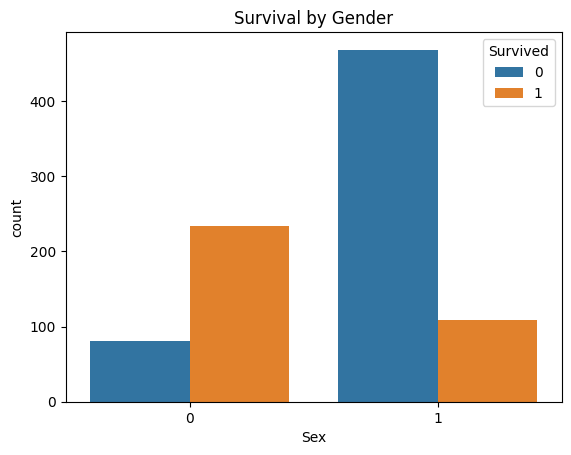

In [660]:
# 성별에 따른 생존률
sns.countplot(data=titanic_data, x='Sex', hue='Survived')
plt.title('Survival by Gender')
plt.show()


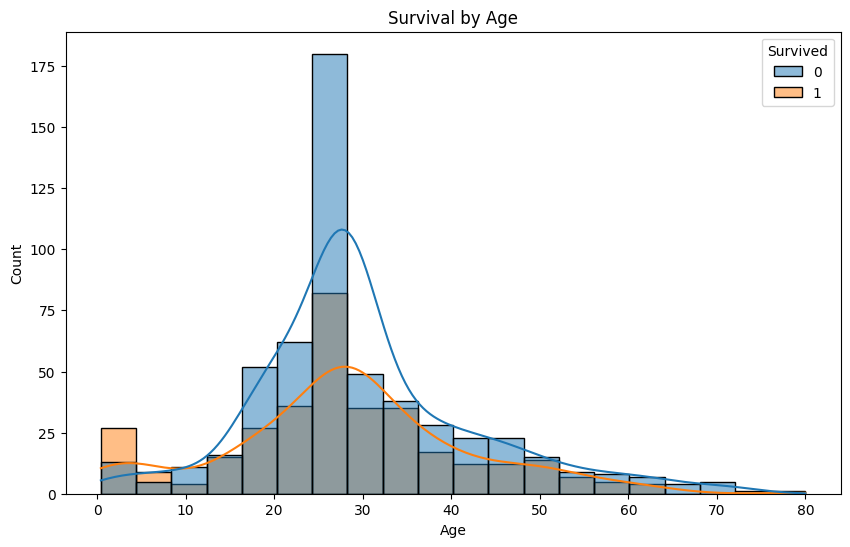

In [661]:
# 나이에 따른 생존 여부 분포
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data, x='Age', hue='Survived', bins=20, kde=True)
plt.title('Survival by Age')
plt.show()


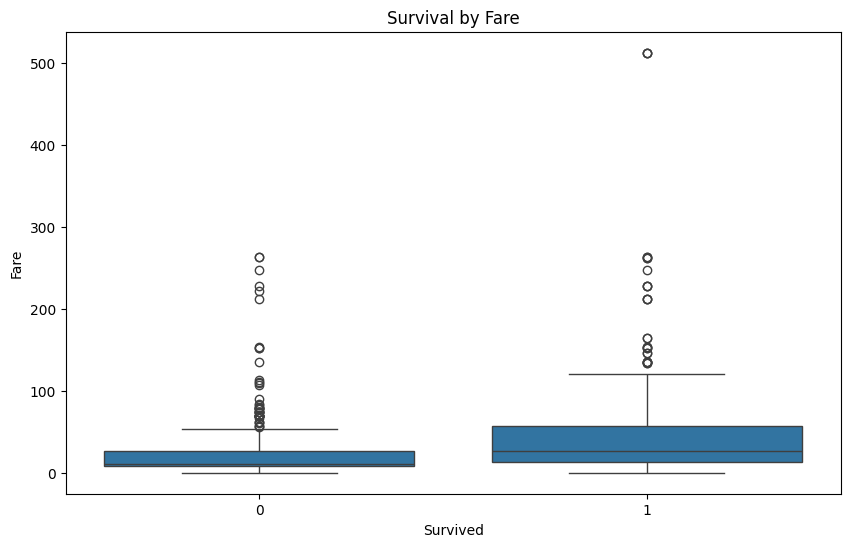

In [662]:
# 운임에 따른 생존 여부
plt.figure(figsize=(10, 6))
sns.boxplot(data=titanic_data, x='Survived', y='Fare')
plt.title('Survival by Fare')
plt.show()


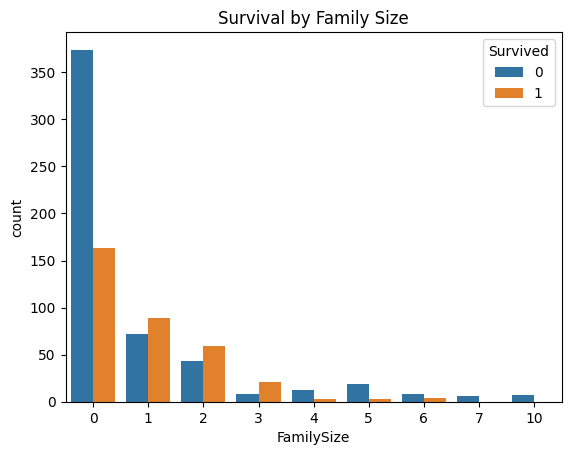

In [663]:
# SibSp + Parch를 합쳐 가족 규모 변수 생성
titanic_data['FamilySize'] = titanic_data['SibSp'] + titanic_data['Parch']
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch']

# 가족 규모에 따른 생존 여부
sns.countplot(data=titanic_data, x='FamilySize', hue='Survived')
plt.title('Survival by Family Size')
plt.show()


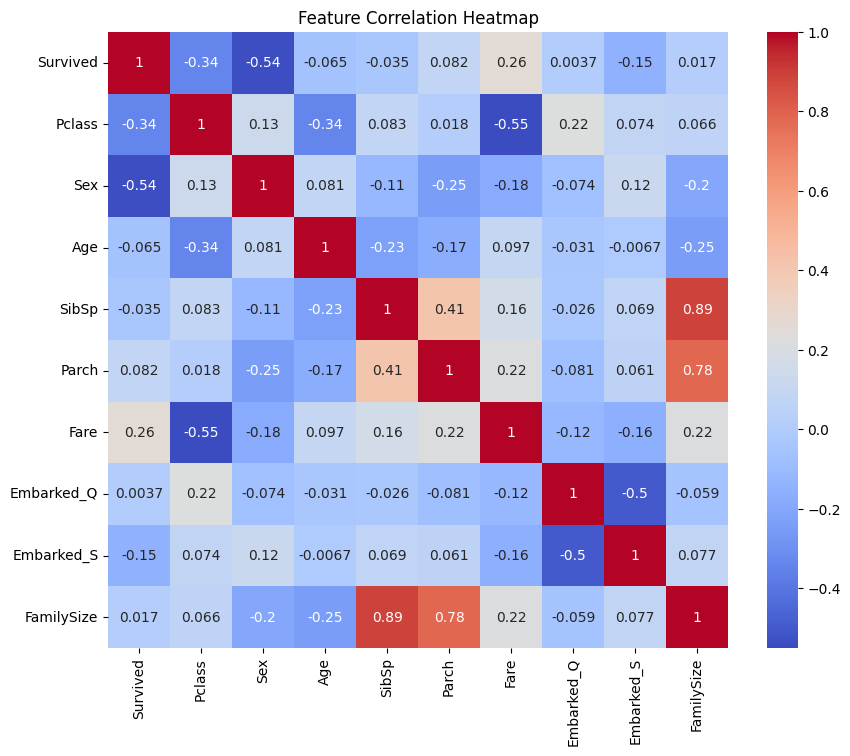

In [664]:
# 상관 계수 계산
correlation_matrix = titanic_data.corr()

# 상관 계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [665]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize
0,0,3,1,22.0,1,0,7.2500,0,1,1
1,1,1,0,38.0,1,0,71.2833,0,0,1
2,1,3,0,26.0,0,0,7.9250,0,1,0
3,1,1,0,35.0,1,0,53.1000,0,1,1
4,0,3,1,35.0,0,0,8.0500,0,1,0


In [666]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [667]:
# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(n_estimators=100, random_state=42)

# 학습
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [668]:
# 예측
y_pred = model.predict(X_test)

# 정확도
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# 정밀도, 재현율, F1 점수
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.83
Confusion Matrix:
 [[91 14]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85       105
           1       0.80      0.77      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



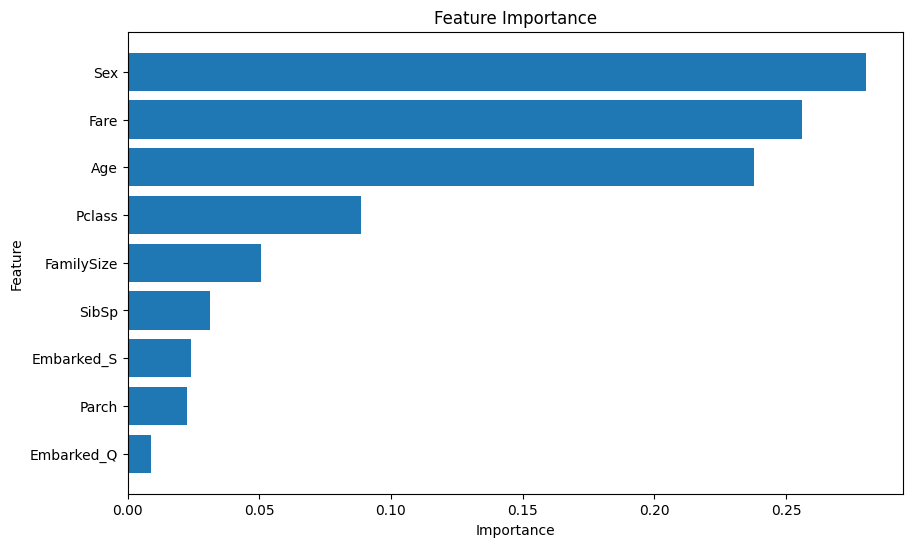

In [669]:
# 변수 중요도 확인
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [670]:
# 모델로 예측
predictions = model.predict(X_test)

# 제출용 DataFrame 생성
submission = pd.DataFrame({
    'PassengerId': passenger_ids,  # 복사한 PassengerId 사용
    'Survived': predictions        # 모델 예측값
})

# 결과 저장
submission.to_csv('submission.csv', index=False)
print("submission.csv 파일이 저장되었습니다!")


ValueError: array length 179 does not match index length 418

In [ ]:
# PassengerId 크기 확인
print(f"PassengerId 길이: {len(passenger_ids)}")

# X_test 크기 확인
print(f"X_test 길이: {len(X_test)}")

# predictions 크기 확인
print(f"predictions 길이: {len(predictions) if 'predictions' in locals() else 'N/A'}")


PassengerId 길이: 418
X_test 길이: 179
predictions 길이: 179


In [ ]:
print(f"훈련 데이터 열: {titanic_data.columns}")
print(f"테스트 데이터 열: {test_data.columns}")


훈련 데이터 열: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S', 'FamilySize'],
      dtype='object')
테스트 데이터 열: Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S', 'FamilySize'],
      dtype='object')
